In [1]:
#Onto boxplot with seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

In [3]:
df=pd.read_csv(r"F:\Jupyter\data_jobs.csv")
df["job_posted_date"]=pd.to_datetime(df["job_posted_date"])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
#Drop Nan values before plotting

df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [5]:
job_titles = ['Data Analyst' , 'Data Scientist', 'Data Engineer']

df_US = df[(df['job_title_short'].isin(job_titles) ) & (df['job_country'] == 'United States')].copy()

In [6]:
#we have lots of Nan values in salary year avg column.Drop it

df_US=df_US.dropna(subset=['salary_year_avg'])
df_US['job_title_short'].value_counts()

job_title_short
Data Scientist    4553
Data Analyst      4350
Data Engineer     2915
Name: count, dtype: int64

In [7]:
job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg']    for job_title in job_titles]
job_list

[109        89000.0
 180        90250.0
 410       133285.0
 988        62623.0
 1413       71300.0
             ...   
 782637     70000.0
 782798    111175.0
 783588    125000.0
 783866    115000.0
 784882     87500.0
 Name: salary_year_avg, Length: 4350, dtype: float64,
 100       228222.0
 116       114000.0
 257       103128.0
 450       157500.0
 1257       70700.0
             ...   
 785324    234500.0
 785488    115000.0
 785563    136400.0
 785648    221875.0
 785692    157500.0
 Name: salary_year_avg, Length: 4553, dtype: float64,
 92        120000.0
 146       129500.0
 307       185000.0
 339       195000.0
 380        97500.0
             ...   
 783111    125000.0
 784102     90000.0
 784191    217500.0
 785624    139216.0
 785641    150000.0
 Name: salary_year_avg, Length: 2915, dtype: float64]

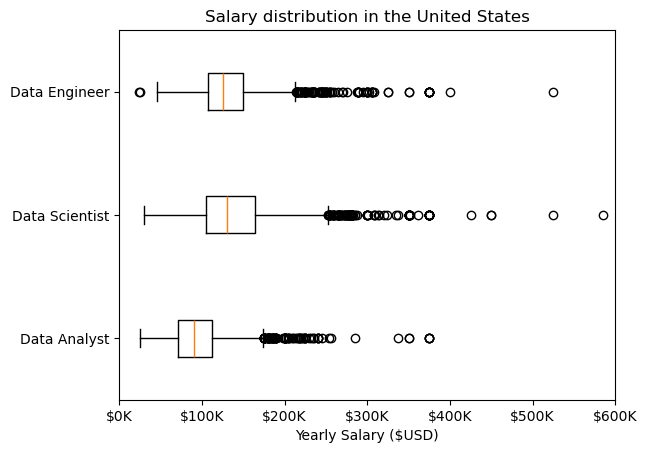

In [8]:
job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg']    for job_title in job_titles]

plt.boxplot(job_list,labels=job_titles,vert=False)
plt.title('Salary distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_:f'${int(x/1000)}K'))
plt.xlim(0,600000)
plt.show()

In [10]:
import seaborn as sns

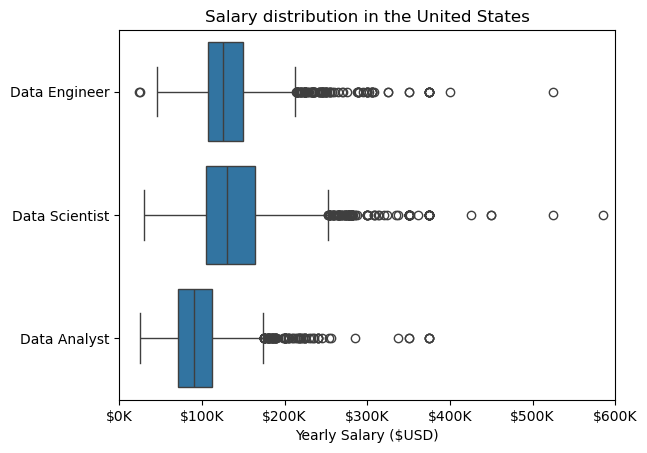

In [12]:
sns.boxplot(data=df_US , x = 'salary_year_avg' , y = 'job_title_short')

plt.title('Salary distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_:f'${int(x/1000)}K'))
plt.xlim(0,600000)
plt.show()